In [1]:
 # To filter the warning messages
import warnings
warnings.filterwarnings('ignore')
# Import required libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read the data
data = pd.read_csv("Historical Product Demand.csv")

In [3]:
# It gives the number rows and columns in the data
data.shape

(1048575, 5)

In [4]:
# Displays total rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [5]:
# Preview of first 5 rows of data
data.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012/7/27,100
1,Product_0979,Whse_J,Category_028,2012/1/19,500
2,Product_0979,Whse_J,Category_028,2012/2/3,500
3,Product_0979,Whse_J,Category_028,2012/2/9,500
4,Product_0979,Whse_J,Category_028,2012/3/2,500


In [6]:
# Preview of the last 5 rows
data.tail()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
1048570,Product_1791,Whse_J,Category_006,2016/4/27,1000
1048571,Product_1974,Whse_J,Category_006,2016/4/27,1
1048572,Product_1787,Whse_J,Category_006,2016/4/28,2500
1048573,Product_0901,Whse_J,Category_023,2016/10/7,50
1048574,Product_0704,Whse_J,Category_001,2016/6/27,4


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   Product_Code      1048575 non-null  object
 1   Warehouse         1048575 non-null  object
 2   Product_Category  1048575 non-null  object
 3   Date              1037336 non-null  object
 4   Order_Demand      1048575 non-null  object
dtypes: object(5)
memory usage: 40.0+ MB


In [8]:
 # Total null values in the data
data.Date.isna().sum()

11239

In [9]:
 # Removing null values
data = data.dropna(subset=['Date'])

In [10]:
# Checking whether null values removed or not
data.isnull().sum()

Product_Code        0
Warehouse           0
Product_Category    0
Date                0
Order_Demand        0
dtype: int64

In [11]:
# Convert the date column from object type to date type
data['Date'] = pd.to_datetime(data['Date'])

In [12]:
 # Converting order demand from object type to int type
data["Order_Demand"] = data["Order_Demand"].str.replace(r"\(|\)", "")
# Convert "Order_Demand" column to int
data["Order_Demand"] = data["Order_Demand"].astype(int)

In [13]:
#Check whether they converted or not
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1037336 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   Product_Code      1037336 non-null  object        
 1   Warehouse         1037336 non-null  object        
 2   Product_Category  1037336 non-null  object        
 3   Date              1037336 non-null  datetime64[ns]
 4   Order_Demand      1037336 non-null  int32         
dtypes: datetime64[ns](1), int32(1), object(3)
memory usage: 43.5+ MB


In [14]:
 # Extract day, week, month, and year
data['Day'] = data['Date'].dt.day
data['Week'] = data['Date'].dt.week
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year
data['Quarter'] = data['Date'].dt.quarter

In [15]:
data['day_of_the_week'] = data.Date.dt.dayofweek

In [16]:
data.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand,Day,Week,Month,Year,Quarter,day_of_the_week
0,Product_0993,Whse_J,Category_028,2012-07-27,100,27,30,7,2012,3,4
1,Product_0979,Whse_J,Category_028,2012-01-19,500,19,3,1,2012,1,3
2,Product_0979,Whse_J,Category_028,2012-02-03,500,3,5,2,2012,1,4
3,Product_0979,Whse_J,Category_028,2012-02-09,500,9,6,2,2012,1,3
4,Product_0979,Whse_J,Category_028,2012-03-02,500,2,9,3,2012,1,4


In [17]:
copied_data = data.copy()

In [18]:
# Set the date feature as indedx for time series analysis
data.set_index('Date', inplace=True)

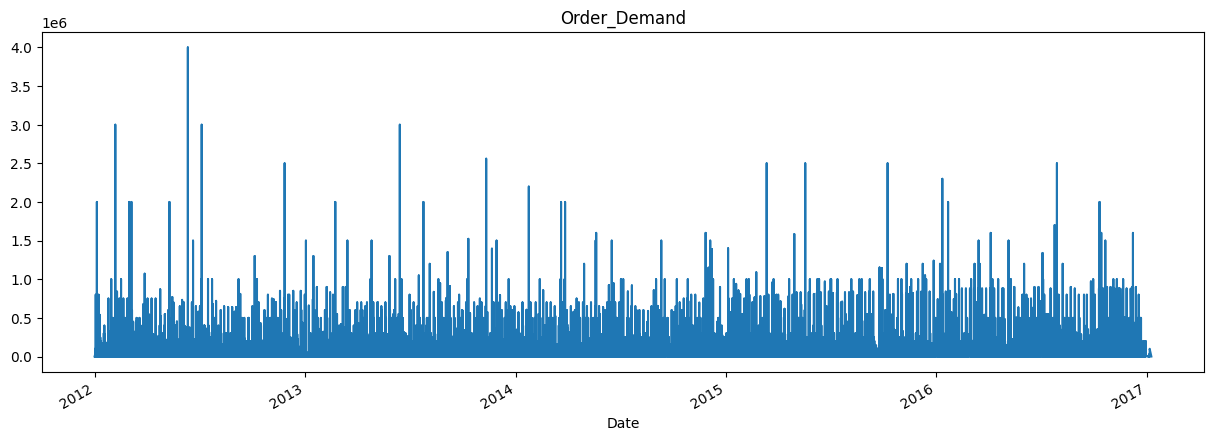

In [19]:
data_new = data.loc[data.index >= '01-01-2012']
data_new.Order_Demand.plot(kind = 'line',figsize=(15, 5), title = 'Order_Demand' )
plt.show()

In [20]:
data = data_new

In [21]:
# Split the data into training and testing data sets
# Train set
data_train = data.loc[data.index <= '2016-01-01'].copy()
# Test set
data_test = data.loc[data.index > '2016-01-01'].copy()

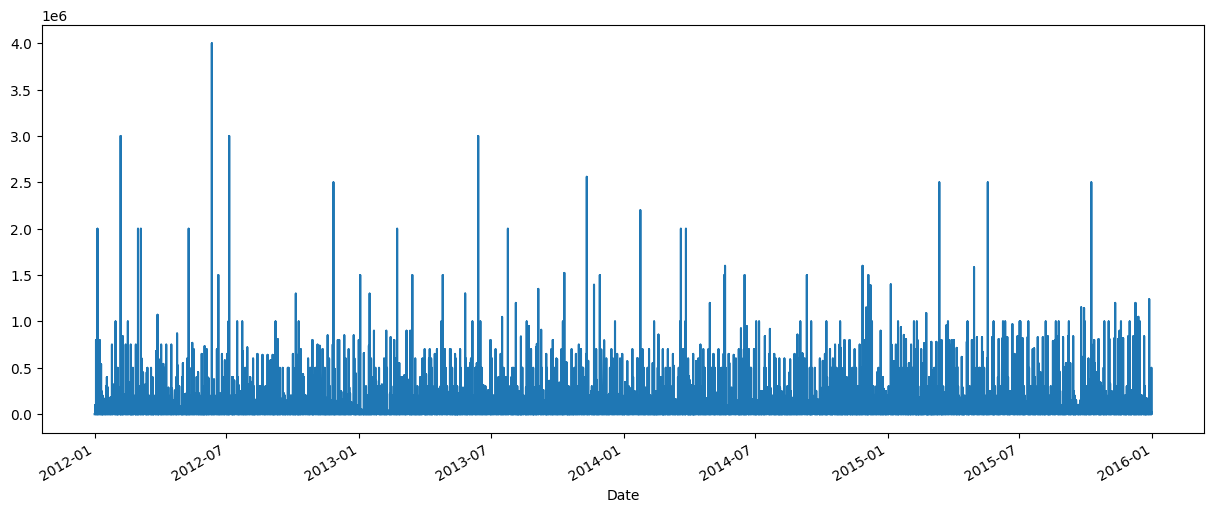

In [22]:
# Train data set
data_train.Order_Demand.plot(figsize = (15, 6))
plt.show()

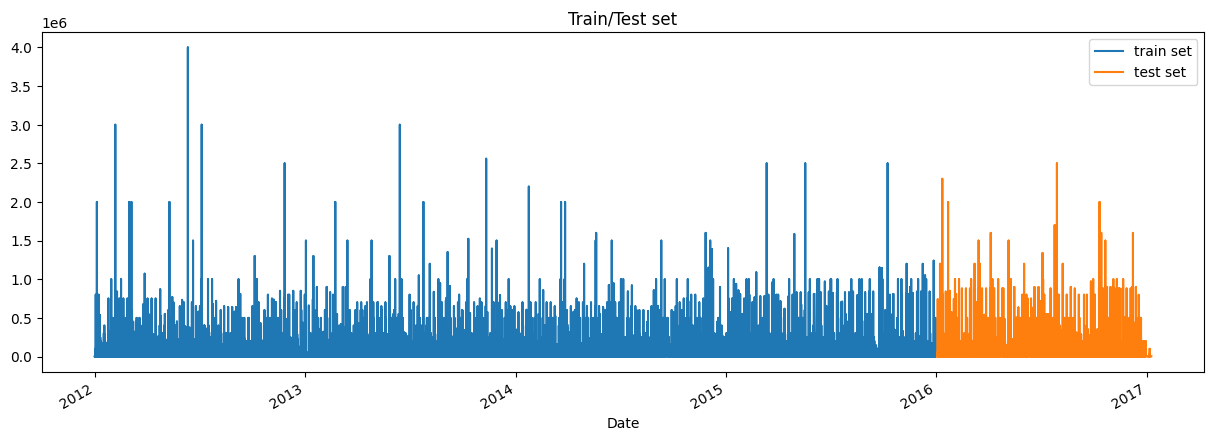

In [23]:
# Train and test data
fig, ax = plt.subplots(figsize = (15,5))
data_train.Order_Demand.plot(ax = ax, label = 'train set',legend = 'train set', title = 'Train/Test set')
data_test.Order_Demand.plot(ax = ax, legend = 'train set', label = 'test set')
plt.show()

In [24]:
# features, Target variable
Features = ['Product_Category', 'Warehouse', 'day_of_the_week','Quarter','Month', 'Year', 'Week']

In [25]:
target = ['Order_Demand']
X_train = data_train[Features]
X_test = data_test[Features]
y_train = data_train[target]
y_test = data_test[target]

In [26]:
# Number of rows in the training data
X_train.shape

(847998, 7)

In [27]:
X_train.head()

,Product_Category,Warehouse,day_of_the_week,Quarter,Month,Year,Week
Date,,,,,,,
2012-07-27,Category_028,Whse_J,4,3,7,2012,30
2012-01-19,Category_028,Whse_J,3,1,1,2012,3
2012-02-03,Category_028,Whse_J,4,1,2,2012,5
2012-02-09,Category_028,Whse_J,3,1,2,2012,6
2012-03-02,Category_028,Whse_J,4,1,3,2012,9


In [28]:
 # Number of rows in the test data
X_test.shape

(188698, 7)

In [29]:
X_train.Product_Category.nunique()

33

In [30]:
 # Label encoding the Product category to high cardinality and to avoid dimensionality
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
X_train['Product_Category'] = encoder.fit_transform(X_train['Product_Category'])
X_test['Product_Category'] = encoder.fit_transform(X_test['Product_Category'])

In [31]:
# One hot encoding
X_train = pd.get_dummies(X_train, columns=['Warehouse'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['Warehouse'], drop_first=True)

In [32]:
X_train.head()

,Product_Category,day_of_the_week,Quarter,Month,Year,Week,Warehouse_Whse_C,Warehouse_Whse_J,Warehouse_Whse_S
Date,,,,,,,,,
2012-07-27,27,4,3,7,2012,30,0,1,0
2012-01-19,27,3,1,1,2012,3,0,1,0
2012-02-03,27,4,1,2,2012,5,0,1,0
2012-02-09,27,3,1,2,2012,6,0,1,0
2012-03-02,27,4,1,3,2012,9,0,1,0


In [33]:
encoded_X_train = X_train
encoded_X_test = X_test

In [34]:
encoded_X_train.head()

,Product_Category,day_of_the_week,Quarter,Month,Year,Week,Warehouse_Whse_C,Warehouse_Whse_J,Warehouse_Whse_S
Date,,,,,,,,,
2012-07-27,27,4,3,7,2012,30,0,1,0
2012-01-19,27,3,1,1,2012,3,0,1,0
2012-02-03,27,4,1,2,2012,5,0,1,0
2012-02-09,27,3,1,2,2012,6,0,1,0
2012-03-02,27,4,1,3,2012,9,0,1,0


In [38]:
# pip install xgboost

In [37]:
from xgboost import XGBRegressor
from xgboost import XGBRegressor
model = XGBRegressor(n_estimators = 1000, early_stopping_rounds = 50,
                     learning_rate = 0.01).fit(encoded_X_train, y_train,
                                               eval_set =[(encoded_X_train,y_train), (encoded_X_test,y_test)],
                                               verbose = 50)

[0]	validation_0-rmse:29003.30193	validation_1-rmse:31206.26952
[50]	validation_0-rmse:28124.91112	validation_1-rmse:31218.32986
[55]	validation_0-rmse:28075.67920	validation_1-rmse:31220.58412


In [39]:
Features = ['Product_Category', 'day_of_the_week', 'Quarter','Month', 'Year','Week', 'Warehouse_Whse_C', 'Warehouse_Whse_J', 'Warehouse_Whse_S']

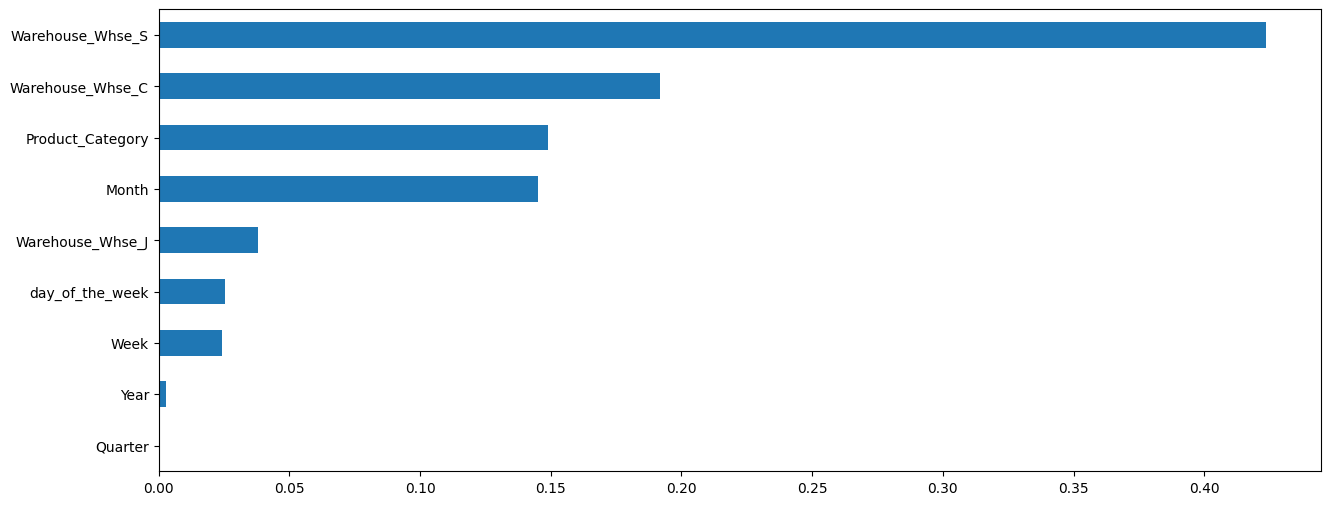

In [40]:
# Features Importance
fea_Imp = pd.DataFrame(model.feature_importances_, index = Features, columns = ['feature_importance'])
#plot the features importance
fea_Imp.feature_importance.sort_values().plot(kind = 'barh', figsize =(15,6))
plt.show()

In [41]:
prediction = model.predict(encoded_X_test)

In [42]:
prediction

array([ 6.2349215,  2.5767078, 95.19905  , ...,  2.0432825,  6.2349215,
        1.670303 ], dtype=float32)

In [43]:
data_test['prediction'] = model.predict(encoded_X_test)

In [44]:
data_test.head()

,Product_Code,Warehouse,Product_Category,Order_Demand,Day,Week,Month,Year,Quarter,day_of_the_week,prediction
Date,,,,,,,,,,,
2016-01-28,Product_1178,Whse_A,Category_024,10,28,4,1,2016,1,3,6.234921
2016-01-04,Product_1502,Whse_C,Category_019,100000,4,1,1,2016,1,0,2.576708
2016-01-06,Product_0190,Whse_A,Category_007,320,6,1,1,2016,1,2,95.199051
2016-01-06,Product_0337,Whse_A,Category_021,2,6,1,1,2016,1,2,118.367813
2016-01-06,Product_1053,Whse_A,Category_024,10,6,1,1,2016,1,2,6.234921


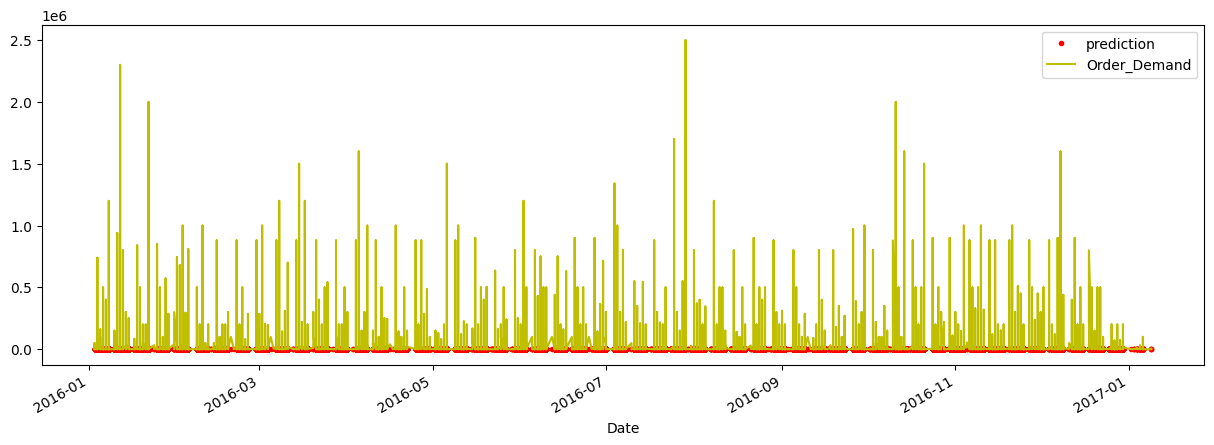

In [45]:
fig, ax = plt.subplots( figsize = (15,5))
data_test.prediction.plot(ax = ax, color = 'r', style = '.', legend ='Prediction')
data_test.Order_Demand.plot(ax = ax, color = 'y', legend = 'Testing')
plt.show()

In [47]:
import seaborn as sns

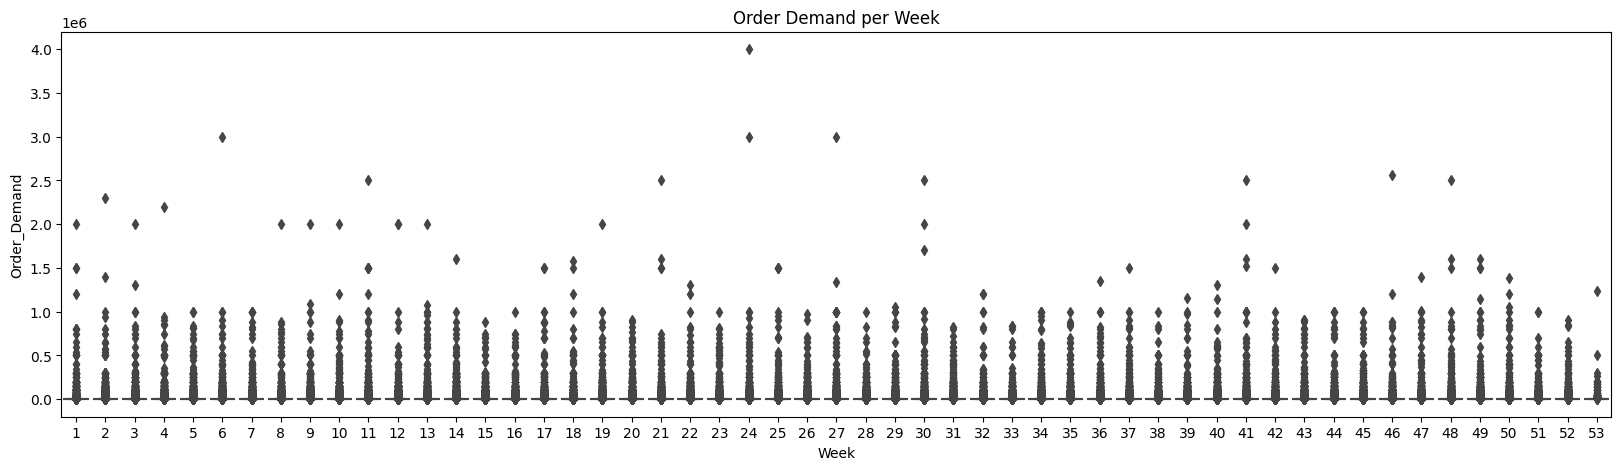

In [48]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.boxplot(data=data, x='Week', y='Order_Demand')
ax.set_title('Order Demand per Week')
plt.show()

In [49]:
# Resample data as Weekly
data_week = data.resample('W').mean()

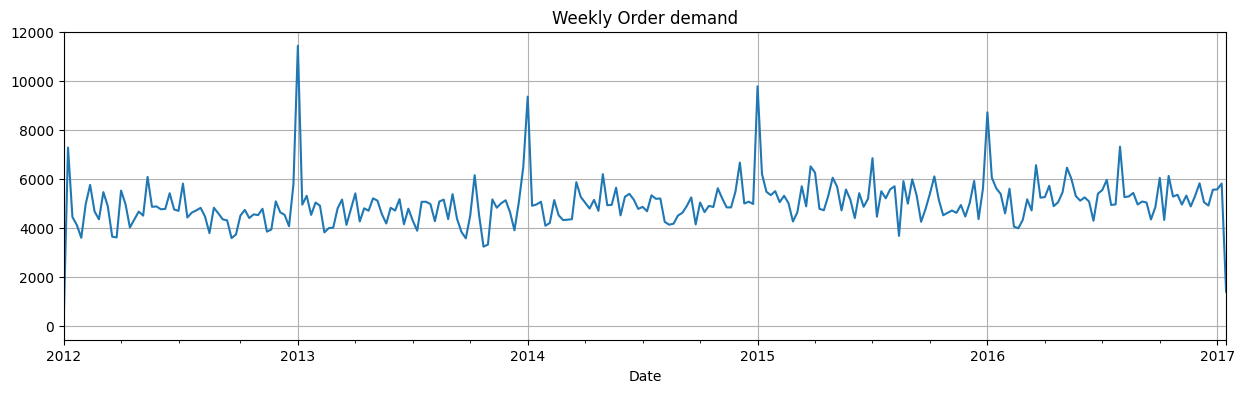

In [50]:
# Weekily trend
data_week['Order_Demand'].plot(figsize = (15,4), title = 'Weekly Order demand')
plt.grid(visible=True)
plt.show()

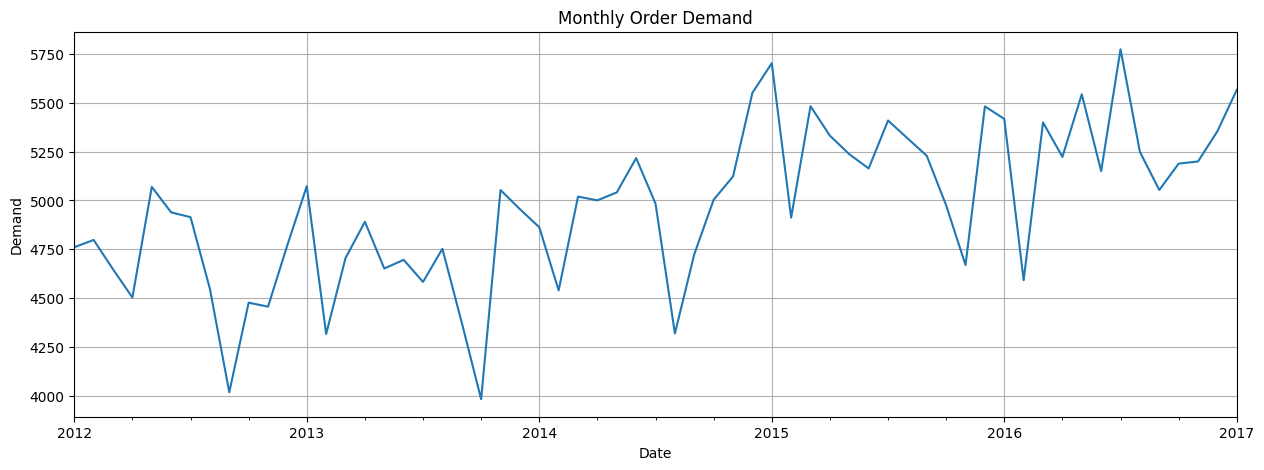

In [51]:
# Monthly trend
data_month = data.resample('MS').mean()
data_month.Order_Demand.plot(title = 'Monthly Order Demand', figsize=(15, 5))
plt.ylabel('Demand')
plt.grid(visible=True)
plt.show()

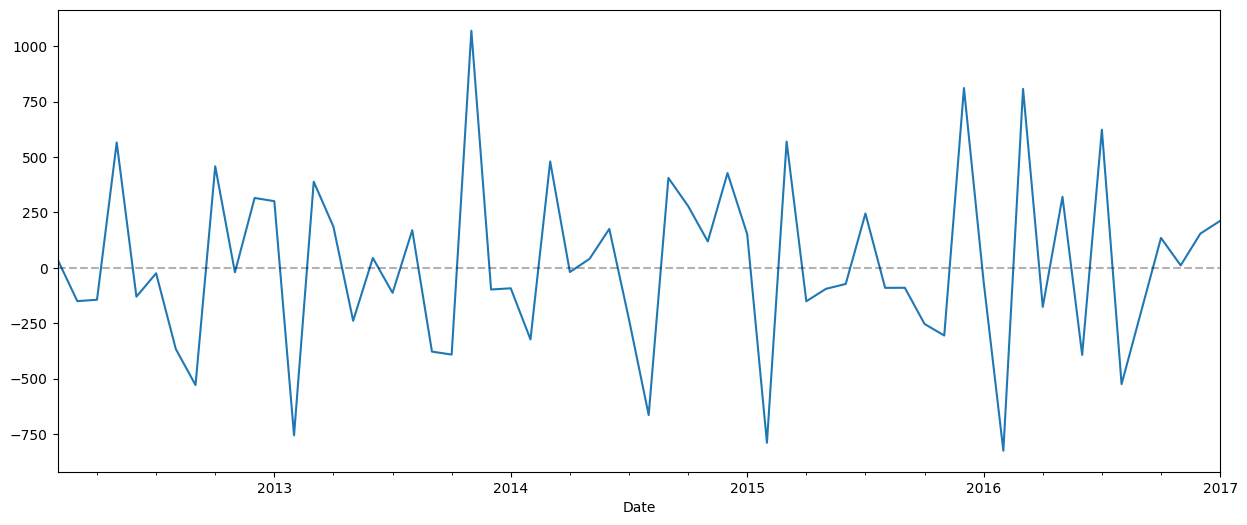

In [52]:
# Take First Difference to Remove Trend
data_diff = data_month.Order_Demand.diff()[1:]
data_diff.plot(figsize=(15,6))
plt.axhline(0, linestyle='--', color='k', alpha=0.3)
plt.show()

In [53]:
data_month = data["Order_Demand"].resample('MS').mean()

In [81]:
data_month.head(2)

,Order_Demand
Date,
2012-01-01,4760.537787
2012-02-01,4797.869006


In [64]:
# pip install statsmodels

In [59]:
import statsmodels.api as sm

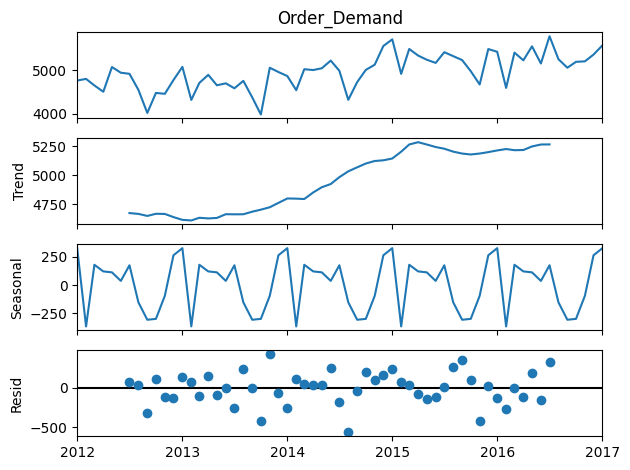

In [67]:
desomposition = sm.tsa.seasonal_decompose(data_month, model="Additive")
fig = desomposition.plot()
plt.show()

In [80]:
# from PIL import Image

# # Load the image
# image_path = r'D:\Celebal\Forecasting model\forecasting_SD.jpg'  # Replace with the actual path to your image
# image = Image.open(image_path)

# # Convert the image to RGB mode
# image = image.convert("RGB")

# # Set the desired resolution (width and height) in pixels
# resolution = (1920, 1080)

# # Resize the image
# image = image.resize(resolution, Image.ANTIALIAS)

# # Save the resized image with high resolution
# output_path = r'D:\Celebal\Forecasting model\Forecasting_SD_res.jpg'  # Replace with the desired output path
# image.save(output_path, 'JPEG', quality=95)

In [72]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(data_month)

In [73]:
print("P value of adfuller test is :", adf_test[1])

P value of adfuller test is : 0.23053730809929224


In [74]:
data_month.head()

Date
2012-01-01    4760.537787
2012-02-01    4797.869006
2012-03-01    4647.560310
2012-04-01    4503.559554
2012-05-01    5069.122546
Freq: MS, Name: Order_Demand, dtype: float64

In [85]:
data_diff.head()

Date
2012-02-01     37.331220
2012-03-01   -150.308697
2012-04-01   -144.000756
2012-05-01    565.562992
2012-06-01   -130.226029
Freq: MS, Name: Order_Demand, dtype: float64

In [75]:
data_month = data_month.to_frame()

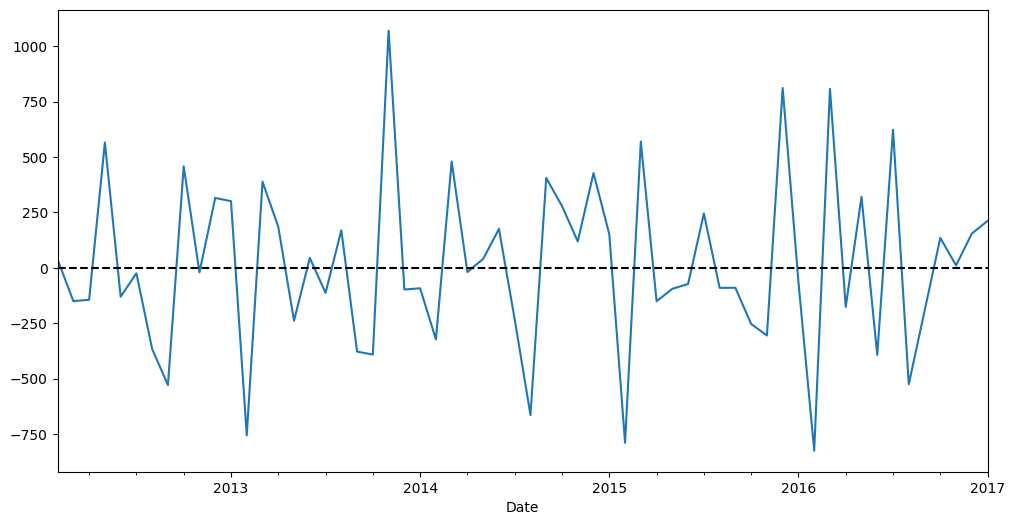

In [76]:
# We can make data stationary by applying difference
# Take First Difference to Remove Trend
data_diff = data_month.Order_Demand.diff()[1:]
data_diff.plot(figsize=(12,6))
plt.axhline(0, linestyle='--', color='k')
plt.show()

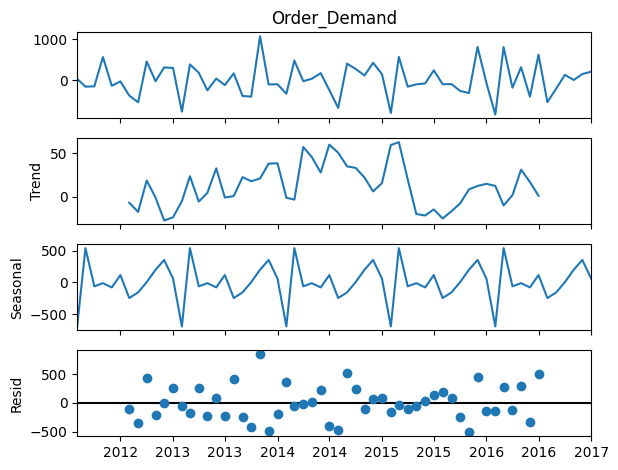

In [83]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib.dates as mdates

# Perform seasonal decomposition
decomposition = sm.tsa.seasonal_decompose(data_diff, model="additive")

# Plot the decomposition
fig = decomposition.plot()

# Customize x-axis tick labels to show human-readable dates (year only)
ax = fig.axes[0]

# Get the x-axis tick locations and convert them to datetime objects
x_ticks = ax.get_xticks()
x_dates = mdates.num2date(x_ticks)

# Format the datetime objects to display only the year
x_labels = [date.strftime("%Y") for date in x_dates]

# Set the x-axis tick labels
ax.set_xticklabels(x_labels)

# Show the plot
plt.show()

In [87]:
# from PIL import Image

# # Load the image
# image_path = r'D:\Celebal\Forecasting model\after_dec.jpg'  # Replace with the actual path to your image
# image = Image.open(image_path)

# # Convert the image to RGB mode
# image = image.convert("RGB")

# # Set the desired resolution (width and height) in pixels
# resolution = (1920, 1080)

# # Resize the image
# image = image.resize(resolution, Image.ANTIALIAS)

# # Save the resized image with high resolution
# output_path = r'D:\Celebal\Forecasting model\after_sd_res.jpg'  # Replace with the desired output path
# image.save(output_path, 'JPEG', quality=95)

In [88]:
adf_test = adfuller(data_diff)
adf_test[1]

2.8284296959133243e-09

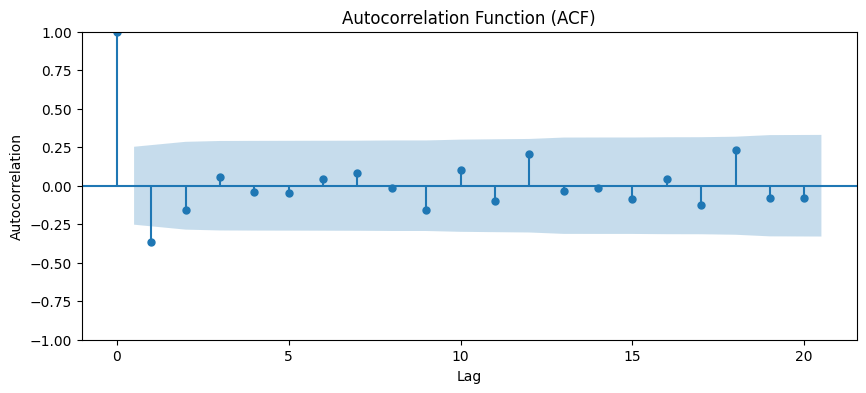

In [96]:
from statsmodels.graphics.tsaplots import plot_acf
# Plot ACF
fig, ax = plt.subplots(figsize=(10, 4))
plot_acf(data_diff, lags=20, ax=ax)

# Set the plot title and axis labels
ax.set_title('Autocorrelation Function (ACF)')
ax.set_xlabel('Lag')
ax.set_ylabel('Autocorrelation')

# Show the plot
plt.show()

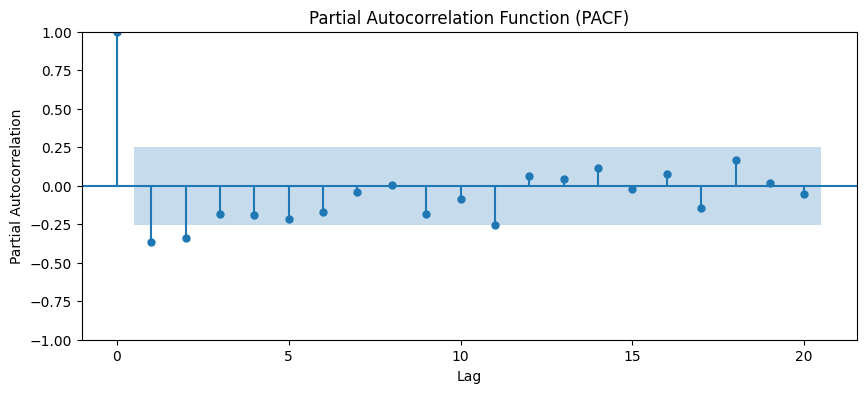

In [98]:
from statsmodels.graphics.tsaplots import plot_pacf

# Plot PACF
fig, ax = plt.subplots(figsize=(10, 4))
plot_pacf(data_diff, lags=20, ax=ax)

# Set the plot title and axis labels
ax.set_title('Partial Autocorrelation Function (PACF)')
ax.set_xlabel('Lag')
ax.set_ylabel('Partial Autocorrelation')

# Show the plot
plt.show()


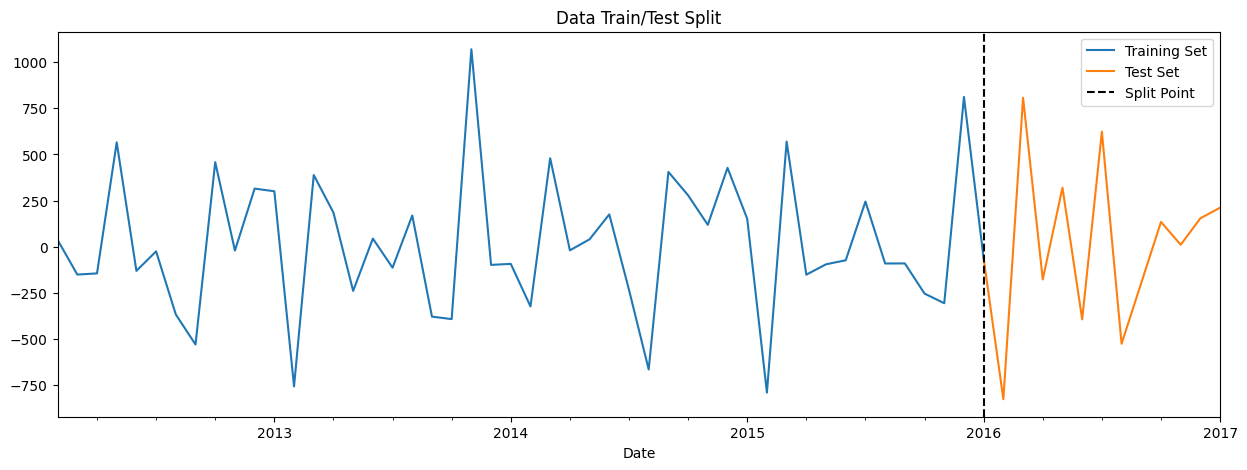

In [100]:
from datetime import datetime
train_end = datetime(2016,1,1)
test_end = datetime(2017,1,1)

data_train = data_diff[:train_end]
data_test = data_diff[train_end:test_end]
# plot train and test dataset on the same graph
fig, ax = plt.subplots(figsize=(15, 5))
data_train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
data_test.plot(ax=ax, label='Test Set')
ax.axvline('01-01-2016', color='black', ls='--')
ax.legend(['Training Set', 'Test Set','Split Point'])
plt.show()

In [102]:
from statsmodels.tsa.arima.model import ARIMA
model_arima = ARIMA(data_train, order = (2,1,1)).fit()

In [103]:
# summary of the model
print(model_arima.summary())

                               SARIMAX Results                                
Dep. Variable:           Order_Demand   No. Observations:                   48
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -343.242
Date:                Tue, 04 Jul 2023   AIC                            694.484
Time:                        23:44:52   BIC                            701.885
Sample:                    02-01-2012   HQIC                           697.269
                         - 01-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3710      0.168     -2.211      0.027      -0.700      -0.042
ar.L2         -0.3259      0.184     -1.768      0.077      -0.687       0.035
ma.L1         -0.9999      0.252     -3.964      0.0

In [104]:
# get the predictions start and end dates
pred_start = data_test.index[0]
pred_end= data_test.index[-1]
# Make predictions
prediction = model_arima.predict(start = pred_start, end = pred_end)
# Get the residuals
residuals = data_test - prediction

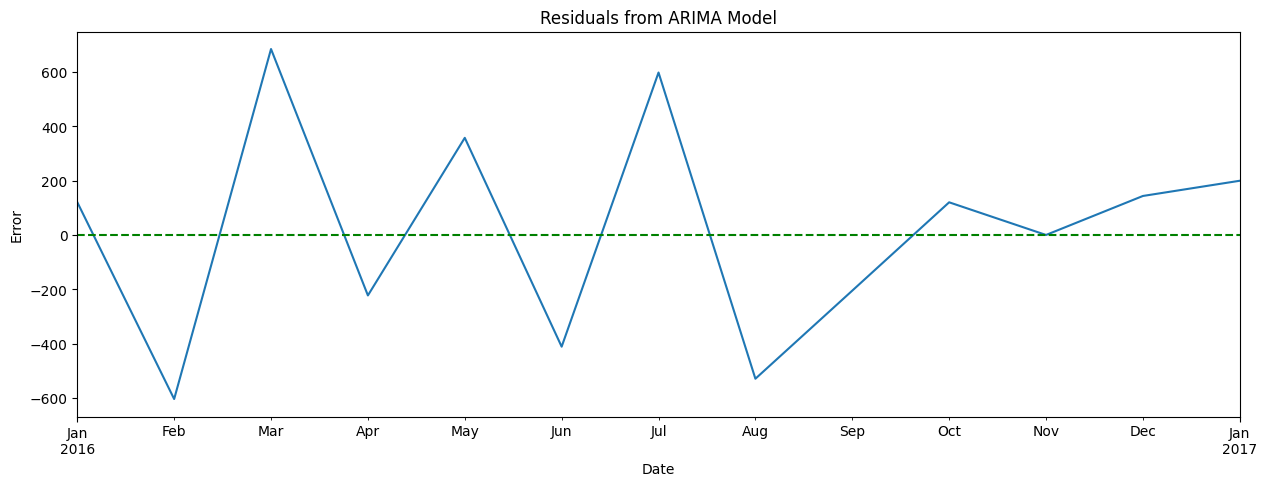

In [105]:
# Plot the residuals
residuals.plot(kind = 'line', title = 'Residuals from ARIMA Model',figsize=(15, 5))
plt.axhline(0,color ='g', linestyle = '--')
plt.ylabel('Error')
plt.show()

In [106]:
# Get the Root Mean Square Error
rmse = np.sqrt(np.mean(residuals**2))
rmse

387.30403388399094

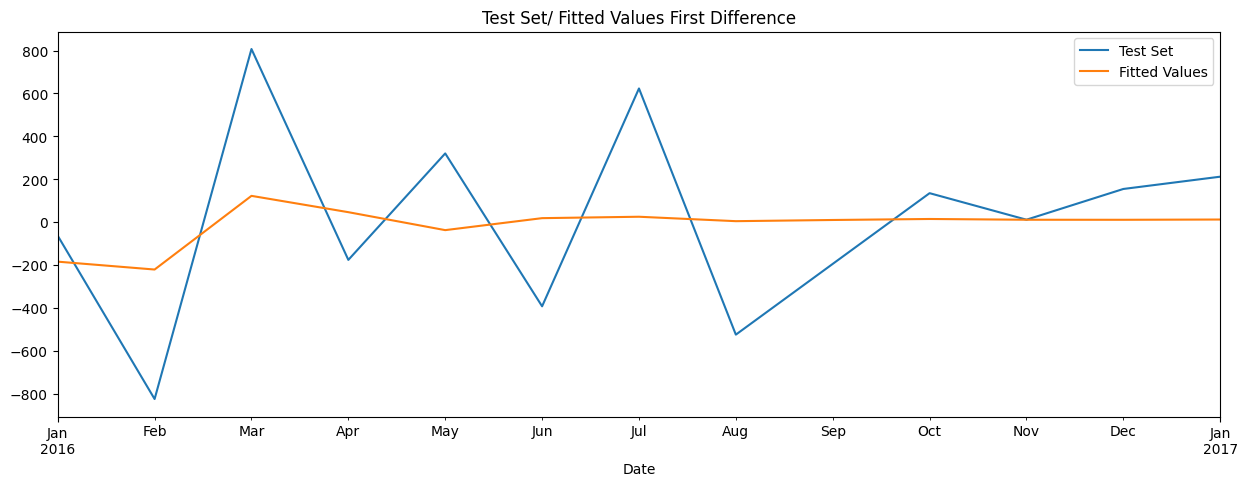

In [107]:
# Plot the train set against the predicted values
fig, ax = plt.subplots(figsize=(15, 5))
data_test.plot(ax=ax, label='Training Set', title='Test Set/ Fitted Values First Difference')
prediction.plot(ax=ax, label='Prediction')
ax.legend(['Test Set', 'Fitted Values'])
plt.show()

In [108]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model_sarima =SARIMAX(data_train, order=(1, 1, 1),seasonal_order=(1, 1, 1, 12),
                      enforce_stationarity=False,
                      enforce_invertibility=False).fit()

print(model_sarima.summary().tables[1])
pred = model_sarima.predict(start = pred_start, end = pred_end)

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2929      0.232     -1.263      0.207      -0.748       0.162
ma.L1         -1.0000      9.961     -0.100      0.920     -20.523      18.523
ar.S.L12      -0.0811      0.380     -0.213      0.831      -0.826       0.664
ma.S.L12      -1.0503      9.499     -0.111      0.912     -19.668      17.567
sigma2      8.553e+04      0.000   6.89e+08      0.000    8.55e+04    8.55e+04


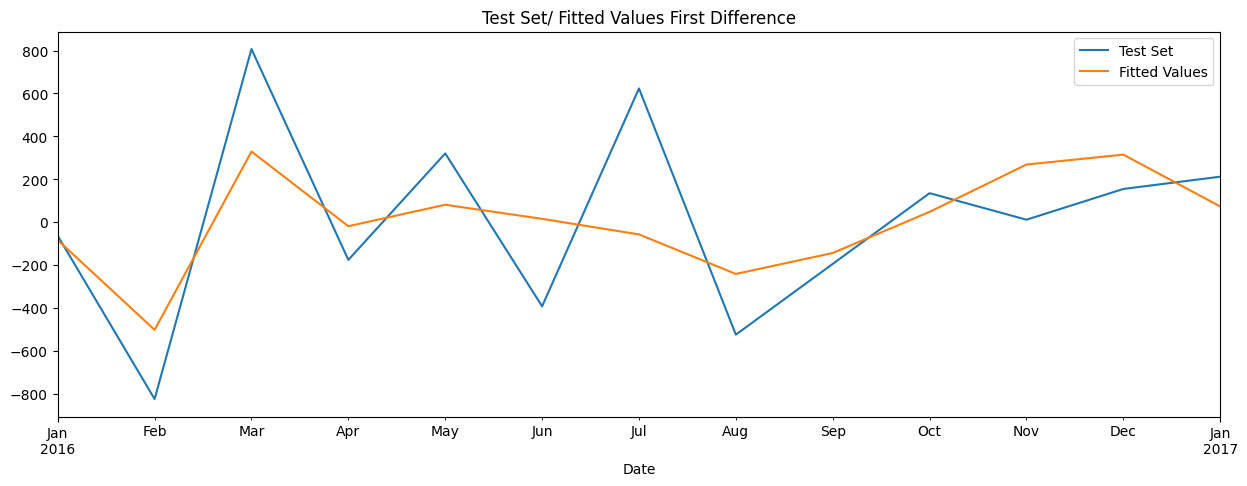

In [109]:
fig, ax = plt.subplots(figsize=(15, 5))
data_test.plot(ax=ax, label='Training Set', title='Test Set/ Fitted Values First Difference')
pred.plot(ax=ax, label='Prediction')
ax.legend(['Test Set', 'Fitted Values'])
plt.show()

In [110]:
# Root Mean Square
res = data_test - pred
rmse = np.sqrt(np.mean(res**2))
rmse

309.6197117823354

In [111]:
data_diff.head()

Date
2012-02-01     37.331220
2012-03-01   -150.308697
2012-04-01   -144.000756
2012-05-01    565.562992
2012-06-01   -130.226029
Freq: MS, Name: Order_Demand, dtype: float64

In [112]:
# Getting only the value of zeroth index since the diff() operation looses first value.
pred.iloc[0] = data_month.query('index == "2016-01-01"')['Order_Demand']
#cumsum Return cumulative sum over a DataFrame or Series axis
model_predicted = pred.cumsum()
model_predicted.head()

2016-01-01    5416.990630
2016-02-01    4914.334203
2016-03-01    5243.311559
2016-04-01    5224.125907
2016-05-01    5304.983611
Freq: MS, Name: predicted_mean, dtype: float64

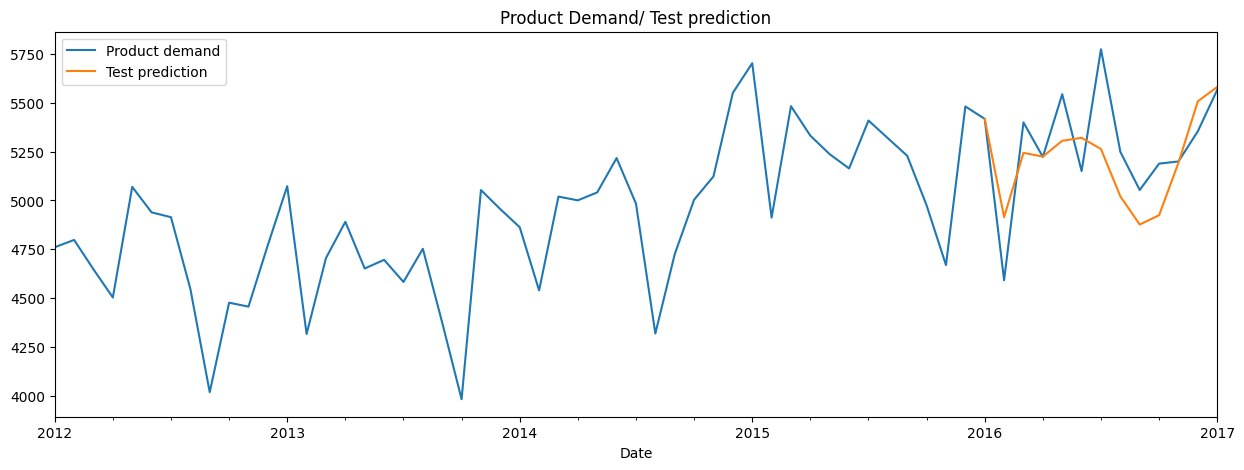

In [113]:
# Plot the actual data set and the actual predicted values
fig, ax = plt.subplots(figsize=(15, 5))
data_month.Order_Demand.plot(ax=ax, label='Product Demand', title='Product Demand/ Test prediction')
model_predicted.plot(ax=ax, label='Test prediction')
ax.legend(['Product demand', 'Test prediction'])
plt.show()

In [114]:
# predict Demand for the next year
future = model_sarima.predict(start = '2017-01-01', end = '2017-12-01')
# Getting only the value of zeroth index since the diff() operation looses first value.
future.iloc[0] = data_month.query('index == "2017-01-01"')['Order_Demand']
#cumsum Return cumulative sum over a DataFrame or Series axis
future = future.cumsum()

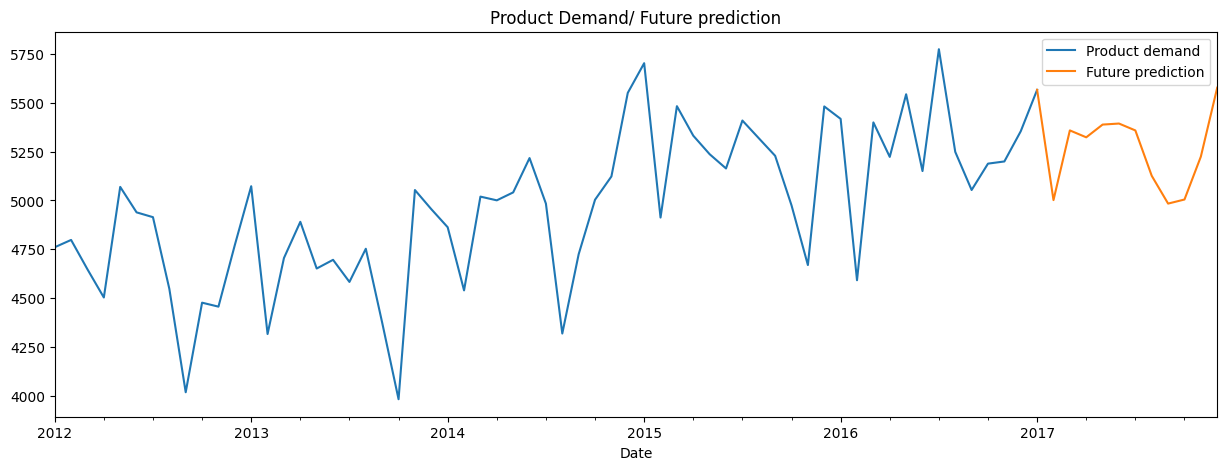

In [115]:
fig, ax = plt.subplots(figsize=(15, 5))
data_month.Order_Demand.plot(ax=ax, label='Product Demand', title='Product Demand/ Future prediction')
future.plot(ax=ax, label='Future')
ax.legend(['Product demand', 'Future prediction'])
plt.show()

In [116]:
import pickle
# Save the model
with open('finalized_model.pkl', 'wb') as f:
    pickle.dump(model_sarima, f)

In [118]:
model = pickle.load(open("finalized_model.pkl", "rb"))

In [119]:
model.forecast(3)

2016-02-01   -502.656427
2016-03-01    328.977356
2016-04-01    -19.185652
Freq: MS, Name: predicted_mean, dtype: float64

In [121]:
data_month.shape

(61, 1)

In [123]:
data_month.to_csv('data_month.csv', index=True)

In [124]:
df = pd.read_csv("data_month.csv", index_col="Date", parse_dates=True)
df.head()

,Order_Demand
Date,
2012-01-01,4760.537787
2012-02-01,4797.869006
2012-03-01,4647.560310
2012-04-01,4503.559554
2012-05-01,5069.122546


<Axes: xlabel='Date'>

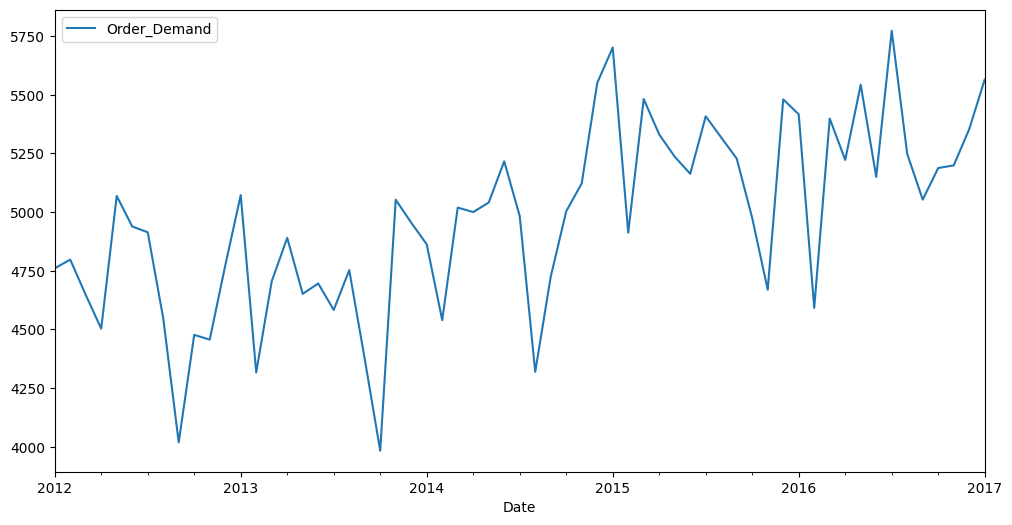

In [125]:
df.plot(figsize=(12,6))

In [126]:
train = df.iloc[:49]
test = df.iloc[49:]

In [127]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [128]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [129]:
scaled_train[:5]

array([[0.45229586],
       [0.47401934],
       [0.38655291],
       [0.30275714],
       [0.63186504]])

In [130]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [131]:

# define generator
n_input = 3
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)
     

In [132]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.45229586 0.47401934 0.38655291]
Predict this y: 
 [[0.30275714]]


In [133]:

# We do the same thing, but now instead for 12 months
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)
     

In [134]:

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [135]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [136]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [138]:
# fit model
model.fit(generator,epochs=50, verbose=0)

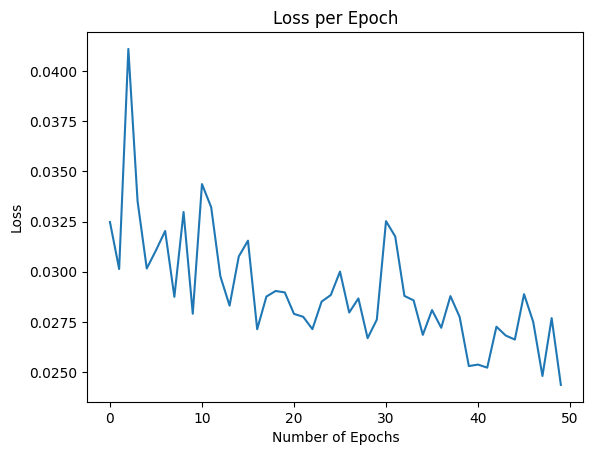

In [141]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)
plt.title("Loss per Epoch")
plt.ylabel("Loss")
plt.xlabel("Number of Epochs")
plt.show()

In [142]:
last_train_batch = scaled_train[-12:]

In [143]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [144]:
model.predict(last_train_batch)

1/1 [==============================] - 0s 187ms/step


array([[0.7026697]], dtype=float32)

In [145]:
scaled_test[0]

array([0.35408031])

In [146]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 34ms/step


In [147]:
test_predictions

[array([0.7026697], dtype=float32),
 array([0.70788985], dtype=float32),
 array([0.7000555], dtype=float32),
 array([0.69267684], dtype=float32),
 array([0.6867338], dtype=float32),
 array([0.6940849], dtype=float32),
 array([0.69276243], dtype=float32),
 array([0.69783884], dtype=float32),
 array([0.6828951], dtype=float32),
 array([0.6427247], dtype=float32),
 array([0.6465962], dtype=float32),
 array([0.6424425], dtype=float32)]

In [148]:
test.head()

,Order_Demand
Date,
2016-02-01,4591.757037
2016-03-01,5398.906955
2016-04-01,5222.581883
2016-05-01,5542.872437
2016-06-01,5150.018943


In [149]:
true_predictions = scaler.inverse_transform(test_predictions)

In [150]:
test['Predictions'] = true_predictions

In [155]:
test.head()

,Order_Demand,Predictions
Date,,
2016-02-01,4591.757037,5190.798400
2016-03-01,5398.906955,5199.769129
2016-04-01,5222.581883,5186.305968
2016-05-01,5542.872437,5173.625980
2016-06-01,5150.018943,5163.412993


In [156]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['Order_Demand'],test['Predictions']))
print(rmse)

319.42822096290723


In [153]:
import pickle
# Save the trained model using pickle
with open('lstm_model_final.pkl', 'wb') as f:
    pickle.dump(model, f)